In [5]:
import funcs

In [6]:
import mne
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
raw=mne.io.read_raw_brainvision('FZ006_intensity.vhdr', preload=True)
raw.filter(0.1, 40.,phase='zero-double');

Using matplotlib as 2D backend.


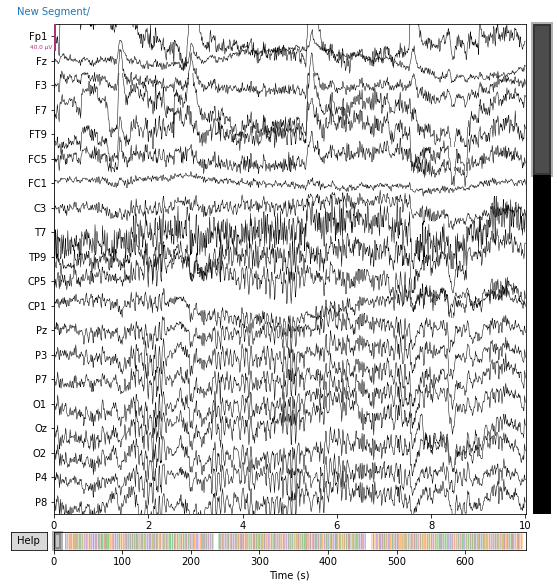

In [ ]:
raw.plot();

In [ ]:
raw.set_montage('standard_1020')

<RawBrainVision | FZ006_intensity.eeg, 65 x 344120 (688.2 s), ~170.7 MB, data loaded>

In [ ]:
events=mne.events_from_annotations(raw)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4']


In [ ]:
events[1]

{'New Segment/': 99999,
 'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  3': 3,
 'Stimulus/S  4': 4}

In [ ]:
epochs=mne.Epochs(raw, events[0])
epochs.average().plot();

Not setting metadata
Not setting metadata
721 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [ ]:
list_of_bads=['FC2']

In [ ]:
raw.info['bads']=list_of_bads
raw.interpolate_bads()

In [ ]:
raw.set_eeg_reference(ref_channels='average');

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97)
ica.fit(raw)
ica.plot_components(picks=range(20), inst=raw);
ica.plot_sources(raw);

In [ ]:
ica_exclude=[0,1,2]

ica.exclude=ica_exclude
ica.apply(raw)

In [ ]:
epochs=mne.Epochs(raw, events[0], event_id={'80dB':1, '70dB':2,'60dB':3, '50dB':4},
                  #reject=dict(eeg=150e-6), 
                  baseline=(-0.2, 0.0), tmin=-0.5, tmax=0.8, preload=True)

In [ ]:
mne.viz.plot_compare_evokeds({'50dB':epochs['50dB'].average(),
                              '60dB':epochs['60dB'].average(),
                              '80dB':epochs['80dB'].average(),
                             }, axes='topo');

In [ ]:
funcs.drop_epochs_by_sigma(epochs, 3)

In [ ]:
epochs.save('FZ006-epo.fif')

In [ ]:
mne.viz.plot_compare_evokeds({'50dB':epochs['50dB'].average(),
                              '60dB':epochs['60dB'].average(),
                              '80dB':epochs['80dB'].average(),
                             }, axes='topo');

In [36]:
import mne
import os
import numpy as np
#%matplotlib qt
import seaborn as sns
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [1]:
import funcs
from funcs import find_comp, find_comp_neg, find_latency, find_latency_neg

In [55]:
list_of_epo=[]
p=['FZ006']
for i in p:
    epochs=mne.read_epochs(i+'-epo.fif')
    epochs=epochs.resample(250)
    list_of_epo.append(epochs)

Reading /Users/nilski/FZ006-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     800.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
494 matching events found
No baseline correction applied
0 projection items activated


Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


/var/folders/wz/xsd3kjy558z4m0d9s3kp8kp00000gn/T/ipykernel_54068/4257512151.py:1: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  ga_50=mne.grand_average([i['50dB'].average() for i in list_of_epo])
/var/folders/wz/xsd3kjy558z4m0d9s3kp8kp00000gn/T/ipykernel_54068/4257512151.py:2: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  ga_60=mne.grand_average([i['60dB'].average() for i in list_of_epo])
/var/folders/wz/xsd3kjy558z4m0d9s3kp8kp00000gn/T/ipykernel_54068/4257512151.py:3: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  ga_70=mne.grand_average([i['70dB'].average() for i in list_of_epo])
/var/folders/wz/xsd3kjy558z4m0d9s3kp8kp00000gn/T/ipykernel_54068/4257512151.py:4: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  ga_80=mne.grand_average([i['80dB'].average() for i in list_of_epo])


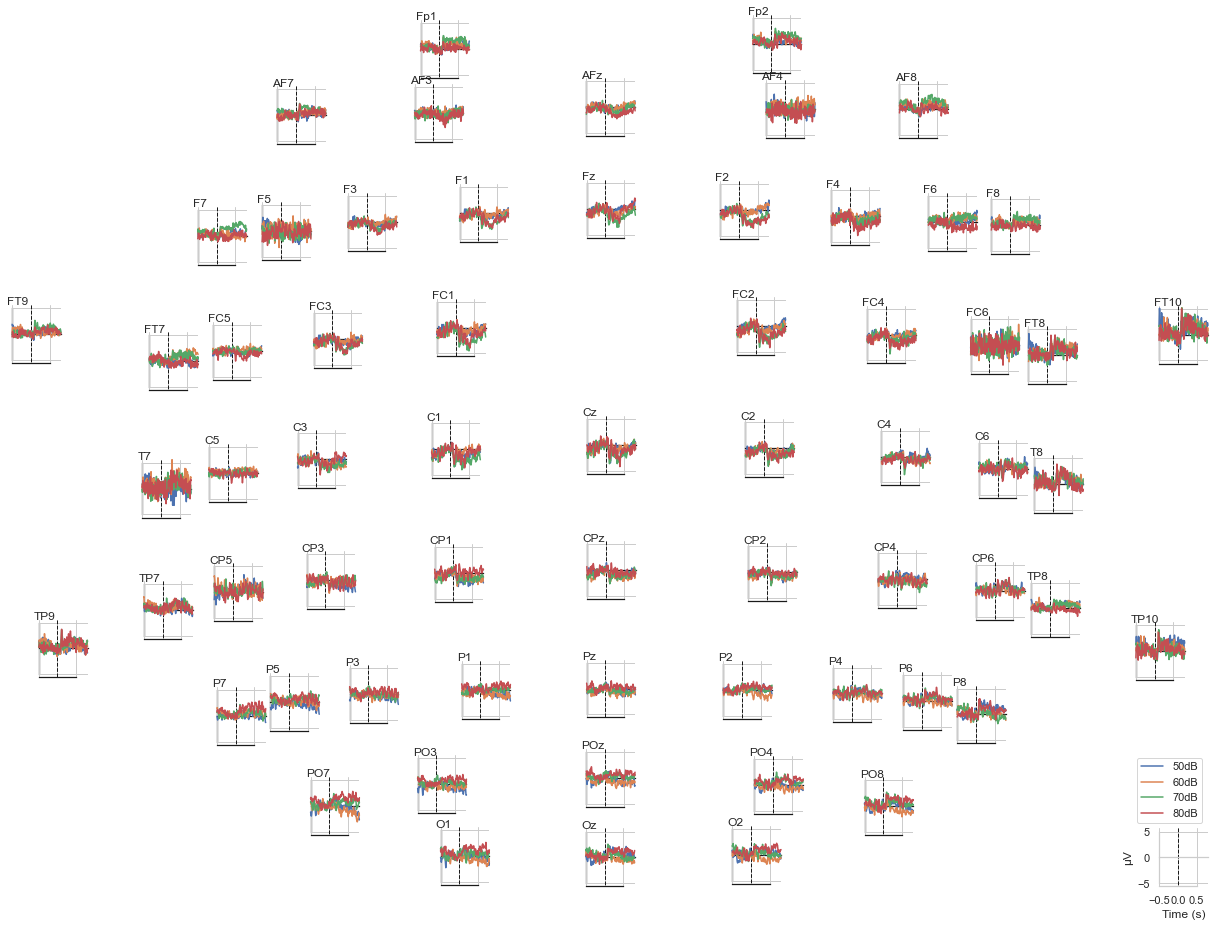

In [63]:
ga_50=mne.grand_average([i['50dB'].average() for i in list_of_epo])
ga_60=mne.grand_average([i['60dB'].average() for i in list_of_epo])
ga_70=mne.grand_average([i['70dB'].average() for i in list_of_epo])
ga_80=mne.grand_average([i['80dB'].average() for i in list_of_epo])

mne.viz.plot_compare_evokeds({'50dB':ga_50,
                              '60dB':ga_60,
                              '70dB':ga_70,
                              '80dB':ga_80,
                             }, axes='topo');

In [40]:
for i in list_of_epo:
    funcs.evoked_to_csv(i, baseline=(-0.2, 0.0),
                        path='' #путь сохранения для csv, если пустой то сохраняются в папке с блокнотом
                       )

Applying baseline correction (mode: mean)


In [44]:
sbj=list(itertools.chain.from_iterable(itertools.repeat(x, 4) for x in (p)))
d = {'ID':sbj, 'COND':len(p)*['50','60','70','80']}
df_td = pd.DataFrame(data=d)

p1=range(20,80)
n1=range(75,130)
p2=range(120,200)
n2=range(180,250)

df_td['P1_window']= len(p)*[p1,p1,p1,p1]
df_td['N1_window']= len(p)*[n1,n1,n1,n1]
df_td['P2_window']= len(p)*[p2,p2,p2,p2]
df_td['N2_window']= len(p)*[n2,n2,n2,n2]

df_td.head()

,ID,COND,P1_window,N1_window,P2_window,N2_window
0,FZ006,50,"(20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","(75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...","(120, 121, 122, 123, 124, 125, 126, 127, 128, ...","(180, 181, 182, 183, 184, 185, 186, 187, 188, ..."
1,FZ006,60,"(20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","(75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...","(120, 121, 122, 123, 124, 125, 126, 127, 128, ...","(180, 181, 182, 183, 184, 185, 186, 187, 188, ..."
2,FZ006,70,"(20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","(75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...","(120, 121, 122, 123, 124, 125, 126, 127, 128, ...","(180, 181, 182, 183, 184, 185, 186, 187, 188, ..."
3,FZ006,80,"(20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","(75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8...","(120, 121, 122, 123, 124, 125, 126, 127, 128, ...","(180, 181, 182, 183, 184, 185, 186, 187, 188, ..."


In [45]:
chan='Cz'
path=''
for i in range(len(p)):
  #Load data for 1 subject
  cond1=pd.read_csv(path+'evoked_'+p[i]+'_50.csv',usecols=['time',chan], sep=';')
  cond2=pd.read_csv(path+'evoked_'+p[i]+'_60.csv',usecols=['time',chan], sep=';')
  cond3=pd.read_csv(path+'evoked_'+p[i]+'_70.csv',usecols=['time',chan], sep=';')
  cond4=pd.read_csv(path+'evoked_'+p[i]+'_80.csv',usecols=['time',chan], sep=';')

  #P1_amp
  p1_50db=find_comp(data=cond1, comp='P1', condition='50', nsubj=p[i], df=df_td, chan=chan)
  p1_60db=find_comp(data=cond2, comp='P1', condition='60', nsubj=p[i], df=df_td, chan=chan)
  p1_70db=find_comp(data=cond3, comp='P1', condition='70', nsubj=p[i], df=df_td, chan=chan)
  p1_80db=find_comp(data=cond4, comp='P1', condition='80', nsubj=p[i], df=df_td, chan=chan)

  #N1_amp
  n1_50db=find_comp_neg(data=cond1, comp='N1', condition='50', nsubj=p[i], df=df_td, chan=chan)
  n1_60db=find_comp_neg(data=cond2, comp='N1', condition='60', nsubj=p[i], df=df_td, chan=chan)
  n1_70db=find_comp_neg(data=cond3, comp='N1', condition='70', nsubj=p[i], df=df_td, chan=chan)
  n1_80db=find_comp_neg(data=cond4, comp='N1', condition='80', nsubj=p[i], df=df_td, chan=chan)

  #P2_amp
  p2_50db=find_comp(data=cond1, comp='P2', condition='50', nsubj=p[i], df=df_td, chan=chan)
  p2_60db=find_comp(data=cond2, comp='P2', condition='60', nsubj=p[i], df=df_td, chan=chan)
  p2_70db=find_comp(data=cond3, comp='P2', condition='70', nsubj=p[i], df=df_td, chan=chan)
  p2_80db=find_comp(data=cond4, comp='P2', condition='80', nsubj=p[i], df=df_td, chan=chan)

  #N2_amp
  n2_50db=find_comp_neg(data=cond1, comp='N2', condition='50', nsubj=p[i], df=df_td, chan=chan)
  n2_60db=find_comp_neg(data=cond2, comp='N2', condition='60', nsubj=p[i], df=df_td, chan=chan)
  n2_70db=find_comp_neg(data=cond3, comp='N2', condition='70', nsubj=p[i], df=df_td, chan=chan)
  n2_80db=find_comp_neg(data=cond4, comp='N2', condition='80', nsubj=p[i], df=df_td, chan=chan)

  #P1_latency
  p1_50db=find_latency(data=cond1, comp='P1', condition='50', nsubj=p[i], df=df_td, chan=chan)
  p1_60db=find_latency(data=cond2, comp='P1', condition='60', nsubj=p[i], df=df_td, chan=chan)
  p1_70db=find_latency(data=cond3, comp='P1', condition='70', nsubj=p[i], df=df_td, chan=chan)
  p1_80db=find_latency(data=cond4, comp='P1', condition='80', nsubj=p[i], df=df_td, chan=chan)

  #P2_latency
  p2_50db=find_latency(data=cond1, comp='P2', condition='50', nsubj=p[i], df=df_td, chan=chan)
  p2_60db=find_latency(data=cond2, comp='P2', condition='60', nsubj=p[i], df=df_td, chan=chan)
  p2_70db=find_latency(data=cond3, comp='P2', condition='70', nsubj=p[i], df=df_td, chan=chan)
  p2_80db=find_latency(data=cond4, comp='P2', condition='80', nsubj=p[i], df=df_td, chan=chan)

  #N1_latency
  n1_50db=find_latency_neg(data=cond1, comp='N1', condition='50', nsubj=p[i], df=df_td, chan=chan)
  n1_60db=find_latency_neg(data=cond2, comp='N1', condition='60', nsubj=p[i], df=df_td, chan=chan)
  n1_70db=find_latency_neg(data=cond3, comp='N1', condition='70', nsubj=p[i], df=df_td, chan=chan)
  n1_80db=find_latency_neg(data=cond4, comp='N1', condition='80', nsubj=p[i], df=df_td, chan=chan)

  #N2_latency
  n2_50db=find_latency_neg(data=cond1, comp='N2', condition='50', nsubj=p[i], df=df_td, chan=chan)
  n2_60db=find_latency_neg(data=cond2, comp='N2', condition='60', nsubj=p[i], df=df_td, chan=chan)
  n2_70db=find_latency_neg(data=cond3, comp='N2', condition='70', nsubj=p[i], df=df_td, chan=chan)
  n2_80db=find_latency_neg(data=cond4, comp='N2', condition='80', nsubj=p[i], df=df_td, chan=chan)

df_td['N1P2']=abs(df_td['P2_AMP']-df_td['N1_AMP'])

list_of_int=[int(i) for i in list(df_td.COND)]

df_td['COND']=list_of_int

df_td=df_td.drop(columns=['P1_window', 'N1_window', 'P2_window', 'N2_window'])

conditions=[50, 60, 70, 80]
results = [x for x in itertools.combinations(conditions, 2)]
me=dict()

for i, sub in enumerate(p):
    me[sub]=[]
    for c, cond in enumerate(results):
        df=df_td[(df_td['ID']==sub)][(df_td[(df_td['ID']==sub)]['COND']==cond[0])
                                    | (df_td[(df_td['ID']==sub)]['COND']==cond[1])]
        res=sm.OLS(df.N1P2, df.COND)
        res=res.fit()
        me[sub].append(res.params[0])

In [46]:
df_td

,ID,COND,P1_AMP,N1_AMP,P2_AMP,N2_AMP,P1_LAT,P2_LAT,N1_LAT,N2_LAT,N1P2
0,FZ006,50,0.755232,-1.171503,-1.448358,-0.541455,36.0,198.0,128.0,222.0,0.276855
1,FZ006,60,1.065243,-1.023274,-0.062623,-0.241993,36.0,184.0,102.0,242.0,0.960651
2,FZ006,70,0.140078,-2.206031,-1.201955,-1.284481,20.0,152.0,102.0,232.0,1.004076
3,FZ006,80,0.887802,-1.776290,-0.392935,-1.150454,32.0,152.0,106.0,198.0,1.383355


Text(8.96, 0.5, 'N1/P2 amplitude')

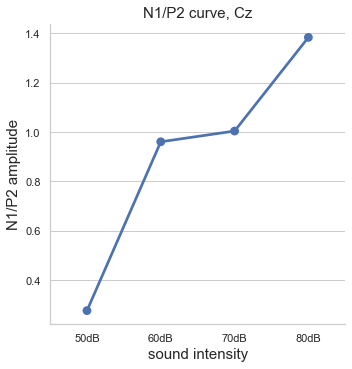

In [47]:
sns.set(style="whitegrid", font_scale=1)
g=sns.catplot(x='COND', y='N1P2', data=df_td, kind='point')

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#g.set_xticklabels(rotation=90)
plt.title('N1/P2 curve, '+chan, size=15)
plt.xticks(ticks=[0,1,2,3], labels=['50dB', '60dB', '70dB', '80dB'])
#plt.yticks()
plt.xlabel('sound intensity', fontsize=15)
plt.ylabel('N1/P2 amplitude', fontsize=15)

In [48]:
medians=[np.median(me[x]) for x in me]
slope_list=[]
for i, c in enumerate (p):
    df=df_td[df_td['ID']==c]
    res=sm.OLS(df.N1P2, df.COND)
    res=res.fit()
    slope_list.append(res.params[0])

slopes=pd.DataFrame({'ID':p, 'ASF':slope_list, 'ME':medians})
slopes.head()

,ID,ASF,ME
0,FZ006,0.014508,0.01452


Text(0.5, 1.0, 'ASF & ME')

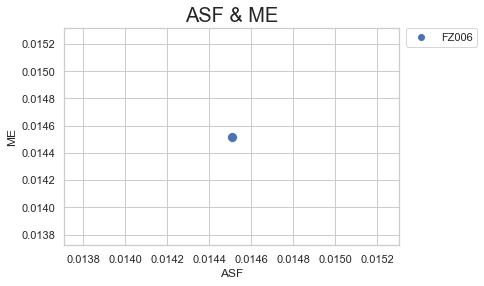

In [49]:
sns.set_context("paper")
sns.set(style="whitegrid", font_scale=1)
g=sns.scatterplot(x='ASF', y='ME', data=slopes, hue='ID', s=100);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#g.set_xticklabels(rotation=90)
#g.set(xticks=[0,])
plt.title('ASF & ME', size=20)